# import data

In [7]:
import pandas as pd
import numpy as np
import glob

In [3]:
n=0
list_data=[]
for name in glob.glob('/Users/yoga/Documents/Projects/10Eco_applied eco_replicate mini wage/SIPP/targted file new/*.csv'):
    n=n+1
    data_i=pd.read_csv(name)
#     print(n,name)
    list_data.append(data_i)
    
    
    
    

/Users/yoga/opt/anaconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3071: DtypeWarning: Columns (13) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [16]:
all_data=pd.concat(list_data)

In [17]:
all_data[1:2]

,ssuid,tage,tpyrate1,tfipsst,euectyp5,eawop,rmhrswk,ehrsall,ehrsbs1,ehrsbs2,thearn,thtotinc,rhpov,rfpov,rfownkid,eeducate,rhcalmn,rhcalyr
1,19128000276,31,Not in universe or none,Florida,Not in Universe,Not in Universe,"Did not work (did not have a job,",Not in Universe,Not in Universe,Not in Universe,0,252,1477,1477,1,Bachelor's degree (for example:,January,2011


In [18]:
# all_data.to_csv('/Users/yoga/Documents/Projects/10Eco_applied eco_replicate mini wage/SIPP/targted file new/new_combine all data.csv',index=0)

# process the data

In [19]:
#filter age between 16 and 64
# wave11age=wave11.loc[(wave11['tage'].astype(int)<65) and (wave11['tage'].astype(int)>15)]
# wave11age
all_data2=all_data[all_data['tage']!='Less than 1 full year old']
all_data2['tage'] = all_data2['tage'].astype(int)

all_data2age = all_data2.loc[(all_data2['tage'] >= 16) & (all_data2['tage'] <= 64)]

<ipython-input-19-dc5ab34e5ae1>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  all_data2['tage'] = all_data2['tage'].astype(int)


In [20]:
all_data2age[1:2]

,ssuid,tage,tpyrate1,tfipsst,euectyp5,eawop,rmhrswk,ehrsall,ehrsbs1,ehrsbs2,thearn,thtotinc,rhpov,rfpov,rfownkid,eeducate,rhcalmn,rhcalyr
1,19128000276,31,Not in universe or none,Florida,Not in Universe,Not in Universe,"Did not work (did not have a job,",Not in Universe,Not in Universe,Not in Universe,0,252,1477,1477,1,Bachelor's degree (for example:,January,2011


In [21]:
#filter wage
filterwage=all_data2age[all_data2age['tpyrate1']!='Not in universe or none']
filterwage


,ssuid,tage,tpyrate1,tfipsst,euectyp5,eawop,rmhrswk,ehrsall,ehrsbs1,ehrsbs2,thearn,thtotinc,rhpov,rfpov,rfownkid,eeducate,rhcalmn,rhcalyr
16,19128000334,25,10,New York,Not in Universe,No,All weeks 35+,40,Not in Universe,Not in Universe,5000,5002,1228,1228,0,Bachelor's degree (for example:,January,2011
17,19128000334,25,10,New York,Not in Universe,No,All weeks 35+,40,Not in Universe,Not in Universe,5000,5002,1466,1466,1,Bachelor's degree (for example:,October,2010
18,19128000334,25,10,New York,Not in Universe,No,All weeks 35+,40,Not in Universe,Not in Universe,5000,5002,1220,1220,0,Bachelor's degree (for example:,November,2010
19,19128000334,25,10,New York,Not in Universe,No,All weeks 35+,40,Not in Universe,Not in Universe,5000,5002,1222,1222,0,Bachelor's degree (for example:,December,2010
29,19128000932,18,10,Louisiana,Not in Universe,Yes,All weeks 1-34 hours,20,Not in Universe,Not in Universe,8799,10584,1923,1923,2,11th Grade,January,2011
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
309394,955925986857,59,14.86999999999999922,New York,Not in Universe,Yes,At least 1 week but not all weeks,30,Not in Universe,Not in Universe,3112,3134,1280,1280,0,Associate (2-yr) college degree,June,2012
309415,955958986671,22,9.269999999999999574,California,Not in Universe,No,All weeks 1-34 hours,20,Not in Universe,Not in Universe,0,0,994,994,0,Bachelor's degree (for example:,March,2012
309416,955958986671,22,9.269999999999999574,California,Not in Universe,No,All weeks 1-34 hours,20,Not in Universe,Not in Universe,0,0,996,996,0,Bachelor's degree (for example:,May,2012
309417,955958986671,22,9.269999999999999574,California,Not in Universe,No,All weeks 1-34 hours,20,Not in Universe,Not in Universe,0,0,995,995,0,Bachelor's degree (for example:,June,2012


## aim to create figure 1

In [23]:
# seperate the group by wage 
wave1_filterwage=filterwage.copy()
# wave1_filterwage.iloc[1]['tpyrate1']
wave1_filterwage['tpyrate1'] =wave1_filterwage['tpyrate1'] .astype(float)
wave1_filterwage75=wave1_filterwage[wave1_filterwage['tpyrate1']<7.5]
wave1_filterwage849=wave1_filterwage[(wave1_filterwage['tpyrate1']<8.5)&(wave1_filterwage['tpyrate1']>=7.5)]
wave1_filterwage999=wave1_filterwage[(wave1_filterwage['tpyrate1']<10)&(wave1_filterwage['tpyrate1']>=8.5)]


### read the state data, bounded or not bounded

In [24]:
#next seperate into bounded and unbounded state

state=pd.read_csv('/Users/yoga/Dropbox/0 FSU/4_2022 fall/2_applied economics/3 replication of a paper eco/1_4_2008minimum_wage_by_states_clean.csv')


In [27]:
state2=state[['State','bounded']]
state_bounded=state2[state2['bounded']==1]
state_bounded_list=state_bounded['State'].tolist()


### seperate bounded state and not bounded state 

In [28]:
#filter  bounded
wave1_filterwage75_bounded=wave1_filterwage75[wave1_filterwage75['tfipsst'].isin(state_bounded_list)]
wave1_filterwage849_bounded=wave1_filterwage849[wave1_filterwage849['tfipsst'].isin(state_bounded_list)]
wave1_filterwage999_bounded=wave1_filterwage999[wave1_filterwage999['tfipsst'].isin(state_bounded_list)]


In [29]:
#fiter not bounded data
wave1_filterwage75_nobounded=wave1_filterwage75[~wave1_filterwage75['tfipsst'].isin(state_bounded_list)]
wave1_filterwage849_nobounded=wave1_filterwage849[~wave1_filterwage849['tfipsst'].isin(state_bounded_list)]
wave1_filterwage999_nobounded=wave1_filterwage999[~wave1_filterwage999['tfipsst'].isin(state_bounded_list)]

In [37]:
#save the data of six groups 5.15-7.25 group

group_list=[wave1_filterwage75_nobounded,wave1_filterwage75_bounded,wave1_filterwage849_nobounded,
           wave1_filterwage849_bounded,wave1_filterwage999_nobounded,wave1_filterwage999_bounded]

targe_group725=[]
target_name=['filterwage75_nobounded725','filterwage75_bounded725',
            'filterwage849_nobounded725','filterwage849_bounded725',
            'filterwage999_nobounded725','filterwage999_bounded725',]

for i in range(len(group_list)):
    groupi=group_list[i]
#     namei=target_name[i]
    update725=groupi[(groupi['tpyrate1']>=5.15)&(groupi['tpyrate1']<=7.25)]
#     update725.to_csv(str(i)+namei+".csv",index=0)
    targe_group725.append(update725)

    



In [36]:
wave1_filterwage75_nobounded

,ssuid,tage,tpyrate1,tfipsst,euectyp5,eawop,rmhrswk,ehrsall,ehrsbs1,ehrsbs2,thearn,thtotinc,rhpov,rfpov,rfownkid,eeducate,rhcalmn,rhcalyr
856,19344123268,59,4.19,Florida,Not in Universe,No,All weeks 35+,55,Not in Universe,Not in Universe,5700,7097,1879,1879,1,"Some college, but no degree",October,2010
857,19344123268,59,4.19,Florida,Not in Universe,No,All weeks 35+,55,Not in Universe,Not in Universe,5700,7097,1883,1883,1,"Some college, but no degree",December,2010
858,19344123268,59,4.19,Florida,Not in Universe,No,All weeks 35+,55,Not in Universe,Not in Universe,5700,7097,1880,1880,1,"Some college, but no degree",November,2010
859,19344123268,59,4.19,Florida,Not in Universe,No,All weeks 35+,55,Not in Universe,Not in Universe,5700,7097,1892,1892,1,"Some college, but no degree",January,2011
1098,19344246159,17,7.00,Florida,Not in Universe,No,All weeks 1-34 hours,10,Not in Universe,Not in Universe,10130,10264,1466,1466,1,10th Grade,October,2010
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
308886,955925944720,16,7.25,New York,Not in Universe,No,"Did not work (did not have a job,",12,Not in Universe,Not in Universe,8766,8771,2009,2009,2,11th Grade,April,2012
309051,955925975196,23,2.65,Michigan,Not in Universe,Yes,All weeks 1-34 hours,25,Not in Universe,Not in Universe,1600,1602,996,996,0,"Some college, but no degree",May,2012
309052,955925975196,23,2.65,Michigan,Not in Universe,Yes,All weeks 1-34 hours,25,Not in Universe,Not in Universe,2400,2402,997,997,0,"Some college, but no degree",April,2012
309053,955925975196,23,2.65,Michigan,Not in Universe,Yes,At least 1 week but not all weeks,25,Not in Universe,Not in Universe,1500,1502,995,995,0,"Some college, but no degree",June,2012


In [45]:
len(targe_group725[0])

21116

In [47]:
targe_group725[0]['tage'].mean()

27.722580034097366

In [52]:
more_high_school=['Some college, but no degree',
                  'High School Graduate - (diploma',
                  "Bachelor's degree (for example:",
                  'Associate (2-yr) college degree',
                  "Master's degree (For example: MA,",
                  'Professional School degree (for',
                  'Doctorate degree (for example:' 
                 ]

In [53]:
highschool_more=group_list[0][group_list[0]['eeducate'].isin(more_high_school)]

In [55]:
len(highschool_more)

22477

In [57]:
len(group_list[0])

33807

In [51]:
group_list[0]['eeducate'].unique().tolist()

['Some college, but no degree',
 '10th Grade',
 'High School Graduate - (diploma',
 '12th grade, no diploma',
 "Bachelor's degree (for example:",
 '11th Grade',
 'Associate (2-yr) college degree',
 'Diploma or certificate from a',
 '7th Or 8th Grade',
 '9th Grade',
 '5th Or 6th Grade',
 "Master's degree (For example: MA,",
 'Less Than 1st Grade',
 '1st, 2nd, 3rd or 4th grade',
 'Professional School degree (for',
 'Doctorate degree (for example:']

In [ ]:
more_high_school=['Some college, but no degree',
                  'High School Graduate - (diploma',
                  "Bachelor's degree (for example:",
                  'Associate (2-yr) college degree',
                  "Master's degree (For example: MA,",
                  'Professional School degree (for',
                  'Doctorate degree (for example:' 
                 ]

In [64]:
#calculate the statistics in the table 1
individual=[]
observation=[]
agemean=[]
agestd=[]
childmean=[]
childstd=[]
incomemean=[]
incomestd=[]
hourmean=[]
hourstd=[]
highschoolmean=[]
highschoolstd=[]
wage515_725=[]
employed=[]
df=pd.DataFrame(columns=['number of individuals'])


for i in range(len(group_list)):
    fenmu=group_list[i]
    fenzi=targe_group725[i]
    individual_i=fenzi['ssuid'].nunique()
    individual.append(individual_i)
    
#     observation_i=len(fenzi)
#     observation.append(observation_i)
    
#     agei=fenzi['tage'].mean()
#     agemean.append(agei)
#     agestdi=fenzi['tage'].std()
#     agestd.append(agestdi)
    
#     childi=fenzi['rfownkid'].mean()
#     childmean.append(childi)
#     child_stdi=fenzi['rfownkid'].std()
#     childstd.append(child_stdi)
    
#     incomei= fenzi['thtotinc'].mean()
#     incomemean.append(incomei)
#     incomestdi= fenzi['thtotinc'].std()
#     incomestd.append(incomestdi)
    
#     houri= fenzi['ehrsall'].mean()
#     hourmean.append(houri)

#     houristdi=fenzi['ehrsall'].std()
#     houristd.append(houristdi)
    
#     highschool_more=fenzi[group_list['eeducate'].isin(more_high_school)]
#     number_highschool=len(highschool_more)
#     percentage_highschool=number_highschool/observation_i
#     highschoolmean.append(percentage_highschool)
    
    df = df.append({'number of individuals': individual_i},ignore_index=True)
    
    
    
    
    
    
    
    
    
    
    



In [68]:
targe_group725[3]

,ssuid,tage,tpyrate1,tfipsst,euectyp5,eawop,rmhrswk,ehrsall,ehrsbs1,ehrsbs2,thearn,thtotinc,rhpov,rfpov,rfownkid,eeducate,rhcalmn,rhcalyr


In [66]:
group_list[2]

,ssuid,tage,tpyrate1,tfipsst,euectyp5,eawop,rmhrswk,ehrsall,ehrsbs1,ehrsbs2,thearn,thtotinc,rhpov,rfpov,rfownkid,eeducate,rhcalmn,rhcalyr
588,19228740089,31,7.50,Florida,Not in Universe,No,All weeks 35+,35,Not in Universe,Not in Universe,3524,3524,2300,2300,0,High School Graduate - (diploma,November,2010
589,19228740089,31,7.50,Florida,Not in Universe,No,All weeks 35+,35,Not in Universe,Not in Universe,3524,3524,2315,2315,0,High School Graduate - (diploma,January,2011
590,19228740089,31,7.50,Florida,Not in Universe,No,All weeks 35+,35,Not in Universe,Not in Universe,3524,3524,2304,2304,0,High School Graduate - (diploma,December,2010
591,19228740089,31,7.50,Florida,Not in Universe,No,All weeks 35+,35,Not in Universe,Not in Universe,3524,3524,2299,2299,0,High School Graduate - (diploma,October,2010
596,19228740089,26,8.00,Florida,Not in Universe,No,All weeks 35+,35,Not in Universe,Not in Universe,3524,3524,2300,2300,0,High School Graduate - (diploma,November,2010
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
308726,955925944023,21,7.65,Michigan,Not in Universe,Yes,"Did not work (did not have a job,",40,Not in Universe,Not in Universe,177,4477,2418,2418,2,Associate (2-yr) college degree,April,2012
309287,955925986138,21,7.80,Michigan,Not in Universe,No,All weeks 1-34 hours,18,Not in Universe,Not in Universe,12503,12847,2009,2009,2,"Some college, but no degree",April,2012
309288,955925986138,22,7.80,Michigan,Not in Universe,No,All weeks 1-34 hours,18,Not in Universe,Not in Universe,12503,12847,2004,2004,2,"Some college, but no degree",June,2012
309289,955925986138,21,7.80,Michigan,Not in Universe,No,All weeks 1-34 hours,18,Not in Universe,Not in Universe,12503,12847,2003,2003,2,"Some college, but no degree",March,2012


In [74]:
df=pd.DataFrame()
for i in range(len(group_list)):
    fenmu=group_list[i]
    fenzi=targe_group725[i]
    individual_i=fenzi['ssuid'].nunique()
    print(individual_i)
#     individual.append(individual_i)
    df = df.append({'number of individuals': individual_i},ignore_index=True)
   

1936
2963
0
0
0
0


In [75]:
targe_group725[2]

,ssuid,tage,tpyrate1,tfipsst,euectyp5,eawop,rmhrswk,ehrsall,ehrsbs1,ehrsbs2,thearn,thtotinc,rhpov,rfpov,rfownkid,eeducate,rhcalmn,rhcalyr


## read in the combined data

In [30]:
combine=pd.read_csv('/Users/yoga/Documents/Projects/10Eco_applied eco_replicate mini wage/SIPP/targted file new/new_combine all data.csv')

In [31]:
combine

,ssuid,tage,tpyrate1,tfipsst,euectyp5,eawop,rmhrswk,ehrsall,ehrsbs1,ehrsbs2,thearn,thtotinc,rhpov,rfpov,rfownkid,eeducate,rhcalmn,rhcalyr
0,19128000276,31,Not in universe or none,Florida,Not in Universe,Not in Universe,"Did not work (did not have a job,",Not in Universe,Not in Universe,Not in Universe,0,252,1467,1467,1,Bachelor's degree (for example:,November,2010
1,19128000276,31,Not in universe or none,Florida,Not in Universe,Not in Universe,"Did not work (did not have a job,",Not in Universe,Not in Universe,Not in Universe,0,252,1477,1477,1,Bachelor's degree (for example:,January,2011
2,19128000276,31,Not in universe or none,Florida,Not in Universe,Not in Universe,"Did not work (did not have a job,",Not in Universe,Not in Universe,Not in Universe,0,252,1466,1466,1,Bachelor's degree (for example:,October,2010
3,19128000276,31,Not in universe or none,Florida,Not in Universe,Not in Universe,"Did not work (did not have a job,",Not in Universe,Not in Universe,Not in Universe,0,252,1470,1470,1,Bachelor's degree (for example:,December,2010
4,19128000276,34,Not in universe or none,Florida,Not in Universe,Not in Universe,"Did not work (did not have a job,",Not in Universe,Not in Universe,Not in Universe,0,252,1477,1477,1,Bachelor's degree (for example:,January,2011
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4221114,955958398688,5,Not in universe or none,California,Not in Universe,Not in Universe,Not in Universe,Not in Universe,Not in Universe,Not in Universe,10000,10263,2284,2284,3,Not in Universe,May,2012
4221115,955958986671,22,9.269999999999999574,California,Not in Universe,No,All weeks 1-34 hours,20,Not in Universe,Not in Universe,0,0,994,994,0,Bachelor's degree (for example:,March,2012
4221116,955958986671,22,9.269999999999999574,California,Not in Universe,No,All weeks 1-34 hours,20,Not in Universe,Not in Universe,0,0,996,996,0,Bachelor's degree (for example:,May,2012
4221117,955958986671,22,9.269999999999999574,California,Not in Universe,No,All weeks 1-34 hours,20,Not in Universe,Not in Universe,0,0,995,995,0,Bachelor's degree (for example:,June,2012


In [34]:
#filter age between 16 and 64
# wave11age=wave11.loc[(wave11['tage'].astype(int)<65) and (wave11['tage'].astype(int)>15)]
# wave11age
all_data=combine.copy()

all_data2=all_data[all_data['tage']!='Less than 1 full year old']
all_data2['tage'] = all_data2['tage'].astype(int)

all_data2age = all_data2.loc[(all_data2['tage'] >= 16) & (all_data2['tage'] <= 64)]

<ipython-input-34-2ac59e4d2ba3>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  all_data2['tage'] = all_data2['tage'].astype(int)


In [35]:
#filter wage
filterwage=all_data2age[all_data2age['tpyrate1']!='Not in universe or none']
filterwage

,ssuid,tage,tpyrate1,tfipsst,euectyp5,eawop,rmhrswk,ehrsall,ehrsbs1,ehrsbs2,thearn,thtotinc,rhpov,rfpov,rfownkid,eeducate,rhcalmn,rhcalyr
16,19128000334,25,10,New York,Not in Universe,No,All weeks 35+,40,Not in Universe,Not in Universe,5000,5002,1228,1228,0,Bachelor's degree (for example:,January,2011
17,19128000334,25,10,New York,Not in Universe,No,All weeks 35+,40,Not in Universe,Not in Universe,5000,5002,1466,1466,1,Bachelor's degree (for example:,October,2010
18,19128000334,25,10,New York,Not in Universe,No,All weeks 35+,40,Not in Universe,Not in Universe,5000,5002,1220,1220,0,Bachelor's degree (for example:,November,2010
19,19128000334,25,10,New York,Not in Universe,No,All weeks 35+,40,Not in Universe,Not in Universe,5000,5002,1222,1222,0,Bachelor's degree (for example:,December,2010
29,19128000932,18,10,Louisiana,Not in Universe,Yes,All weeks 1-34 hours,20,Not in Universe,Not in Universe,8799,10584,1923,1923,2,11th Grade,January,2011
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4221094,955925986857,59,14.86999999999999922,New York,Not in Universe,Yes,At least 1 week but not all weeks,30,Not in Universe,Not in Universe,3112,3134,1280,1280,0,Associate (2-yr) college degree,June,2012
4221115,955958986671,22,9.269999999999999574,California,Not in Universe,No,All weeks 1-34 hours,20,Not in Universe,Not in Universe,0,0,994,994,0,Bachelor's degree (for example:,March,2012
4221116,955958986671,22,9.269999999999999574,California,Not in Universe,No,All weeks 1-34 hours,20,Not in Universe,Not in Universe,0,0,996,996,0,Bachelor's degree (for example:,May,2012
4221117,955958986671,22,9.269999999999999574,California,Not in Universe,No,All weeks 1-34 hours,20,Not in Universe,Not in Universe,0,0,995,995,0,Bachelor's degree (for example:,June,2012


In [36]:
# filterwage.to_csv('/Users/yoga/Documents/Projects/10Eco_applied eco_replicate mini wage/SIPP/useful data after processing/age_16_64_with_wage_info.csv')

In [37]:
# seperate the group by wage 
wave1_filterwage=filterwage.copy()
# wave1_filterwage.iloc[1]['tpyrate1']
wave1_filterwage['tpyrate1'] =wave1_filterwage['tpyrate1'] .astype(float)
wave1_filterwage75=wave1_filterwage[wave1_filterwage['tpyrate1']<7.5]
wave1_filterwage849=wave1_filterwage[(wave1_filterwage['tpyrate1']<8.5)&(wave1_filterwage['tpyrate1']>=7.5)]
wave1_filterwage999=wave1_filterwage[(wave1_filterwage['tpyrate1']<10)&(wave1_filterwage['tpyrate1']>=8.5)]


In [8]:
#next seperate into bounded and unbounded state

state=pd.read_csv('/Users/yoga/Dropbox/0 FSU/4_2022 fall/2_applied economics/3 replication of a paper eco/1_4_2008minimum_wage_by_states_clean.csv')


In [11]:
state2=state[['State','bounded']]
state_bounded=state2[state2['bounded']==1]
state_bounded_list=state_bounded['State'].tolist()

In [12]:
#filter  bounded
wave1_filterwage75_bounded=wave1_filterwage75[wave1_filterwage75['tfipsst'].isin(state_bounded_list)]
wave1_filterwage849_bounded=wave1_filterwage849[wave1_filterwage849['tfipsst'].isin(state_bounded_list)]
wave1_filterwage999_bounded=wave1_filterwage999[wave1_filterwage999['tfipsst'].isin(state_bounded_list)]

In [13]:
#fiter not bounded data
wave1_filterwage75_nobounded=wave1_filterwage75[~wave1_filterwage75['tfipsst'].isin(state_bounded_list)]
wave1_filterwage849_nobounded=wave1_filterwage849[~wave1_filterwage849['tfipsst'].isin(state_bounded_list)]
wave1_filterwage999_nobounded=wave1_filterwage999[~wave1_filterwage999['tfipsst'].isin(state_bounded_list)]

In [14]:
#save the data of six groups 5.15-7.25 group

group_list=[wave1_filterwage75_nobounded,wave1_filterwage75_bounded,wave1_filterwage849_nobounded,
           wave1_filterwage849_bounded,wave1_filterwage999_nobounded,wave1_filterwage999_bounded]

targe_group725=[]
target_name=['filterwage75_nobounded725','filterwage75_bounded725',
            'filterwage849_nobounded725','filterwage849_bounded725',
            'filterwage999_nobounded725','filterwage999_bounded725',]

for i in range(len(group_list)):
    groupi=group_list[i]
    namei=target_name[i]
    update725=groupi[(groupi['tpyrate1']>=5.15)&(groupi['tpyrate1']<=7.25)]
#     update725.to_csv(str(i)+namei+".csv",index=0)
    targe_group725.append(update725)

#data is relocated at /Users/yoga/Documents/Projects/10Eco_applied eco_replicate mini wage/SIPP/useful data after processing

In [16]:
# pwd

In [34]:
targe_group725[1][1:2]

,ssuid,tage,tpyrate1,tfipsst,euectyp5,eawop,rmhrswk,ehrsall,ehrsbs1,ehrsbs2,thearn,thtotinc,rhpov,rfpov,rfownkid,eeducate,rhcalmn,rhcalyr
9726,66133881995,18,7.25,South Dakota,Not in Universe,No,All weeks 1-34 hours,10,Not in Universe,Not in Universe,31478,32307,2326,2326,4,11th Grade,February,2011


In [27]:
#bound 
str(targe_group725[0]['tage'].mean())

'27.722580034097366'

In [28]:
str(targe_group725[0]['tage'].std())

'12.831561243733377'

In [29]:
#not bound
str(targe_group725[1]['tage'].std())

'13.349921549080948'

In [30]:
#not bound 
str(targe_group725[1]['tage'].mean())

'29.146163247954085'

In [31]:
 
more_high_school=['Some college, but no degree',
                  'High School Graduate - (diploma',
                  "Bachelor's degree (for example:",
                  'Associate (2-yr) college degree',
                  "Master's degree (For example: MA,",
                  'Professional School degree (for',
                  'Doctorate degree (for example:' 
                 ]

In [32]:
group1=targe_group725[0]
group2=targe_group725[1]

In [37]:
group1['rfownkid'].mean()
group1['rfownkid'].std()

1.4112639696196034

In [39]:
group2['rfownkid'].mean()
group2['rfownkid'].std()


1.296618565567694

In [42]:
group2['thearn'].mean()

3954.357025188649

In [43]:
group2['thearn'].std()

4265.093110399709

In [45]:
len(group2)/len(group_list[1])

0.7814297282146045

In [47]:
group2['tpyrate1'].std()

0.45605147834100057

In [49]:
# print('SORTED DATAFRAME')
# df.sort_values(by = ['Rank', 'Age'], ascending = [True, False], na_position = 'first')

group1=group1.sort_values(by = ['rhcalyr', 'rhcalmn'], ascending = [True, True], na_position = 'first')


In [52]:
group1wage=group1[['tpyrate1','rhcalmn', 'rhcalyr']]

In [51]:
group1.columns

Index(['ssuid', 'tage', 'tpyrate1', 'tfipsst', 'euectyp5', 'eawop', 'rmhrswk',
       'ehrsall', 'ehrsbs1', 'ehrsbs2', 'thearn', 'thtotinc', 'rhpov', 'rfpov',
       'rfownkid', 'eeducate', 'rhcalmn', 'rhcalyr'],
      dtype='object')

In [58]:
wage1=group1wage.groupby([ 'rhcalyr','rhcalmn']).mean()


In [59]:
group2wage=group2[['tpyrate1','rhcalmn', 'rhcalyr']]

wage2=group2wage.groupby([ 'rhcalyr','rhcalmn']).mean()


In [66]:
wage1=wage1.rename(columns={'tpyrate1':'no bound wage'})

In [67]:
wage2=wage2.rename(columns={'tpyrate1':'bound wage'})

In [72]:
wage3=wage1.merge(wage2,left_on=['rhcalyr','rhcalmn'],right_on=['rhcalyr','rhcalmn'],how='left')

In [40]:
#wage3.to_csv('wage for figure2.csv')

In [41]:
ls

Figure 4 Panel C: income change over time.png
SIPP/
figure 2 Panel A: wage change over time.png
income for figure 4.csv
precessing the sipp data.ipynb
table.xlsx
wage for figure 2 after processing the data and clean.csv
wage for figure2.csv


In [42]:
wage3=pd.read_csv('wage for figure2.csv')

In [43]:
wage4=wage3.copy()
wage4.reset_index(inplace=True)

In [44]:
wage4['rhcalmn'].unique()
month=['August', 'December', 'July', 'June', 'May', 'November', 'October',
       'September', 'April', 'February', 'January', 'March']
month_number=['08','12','07','06','05','11','10','09','04','02','01','03']

In [45]:
month2number={}
for i in range(len(month)):
    month2number[month[i]]=month_number[i]
    
    

In [46]:
month2number

{'August': '08',
 'December': '12',
 'July': '07',
 'June': '06',
 'May': '05',
 'November': '11',
 'October': '10',
 'September': '09',
 'April': '04',
 'February': '02',
 'January': '01',
 'March': '03'}

In [47]:
monthpd=pd.DataFrame.from_dict(month2number,orient='index')

In [92]:
wage5=wage4.merge(monthpd,left_on='rhcalmn',right_index=True,how='left')

In [94]:
wage6=wage5.copy()

In [101]:
for i in range(len(wage6)):
    wage6['time'][i]=str(wage6['rhcalyr'][i])+'-'+wage6[0][i]

<ipython-input-101-86c6da04533d>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wage6['time'][i]=str(wage6['rhcalyr'][i])+'-'+wage6[0][i]


In [111]:
wage6=wage6.sort_values(by='time',ascending=True)
wage6=wage6.reset_index(drop=True)

In [100]:
wage6['rhcalyr'][0]

2008

In [114]:
# wage6.to_csv('wage for figure 2 after processing the data and clean.csv')

In [115]:
wage6

,index,rhcalyr,rhcalmn,no bound wage,bound wage,time,0
0,4,2008,May,6.846911,6.611375,2008-05,05
1,3,2008,June,6.869260,6.636166,2008-06,06
2,2,2008,July,6.858554,6.641816,2008-07,07
3,0,2008,August,6.872124,6.650235,2008-08,08
4,7,2008,September,6.880781,6.661833,2008-09,09
5,6,2008,October,6.890857,6.665828,2008-10,10
6,5,2008,November,6.890269,6.679517,2008-11,11
7,1,2008,December,6.898884,6.691538,2008-12,12
8,12,2009,January,6.905233,6.692952,2009-01,01
9,11,2009,February,6.903829,6.698270,2009-02,02


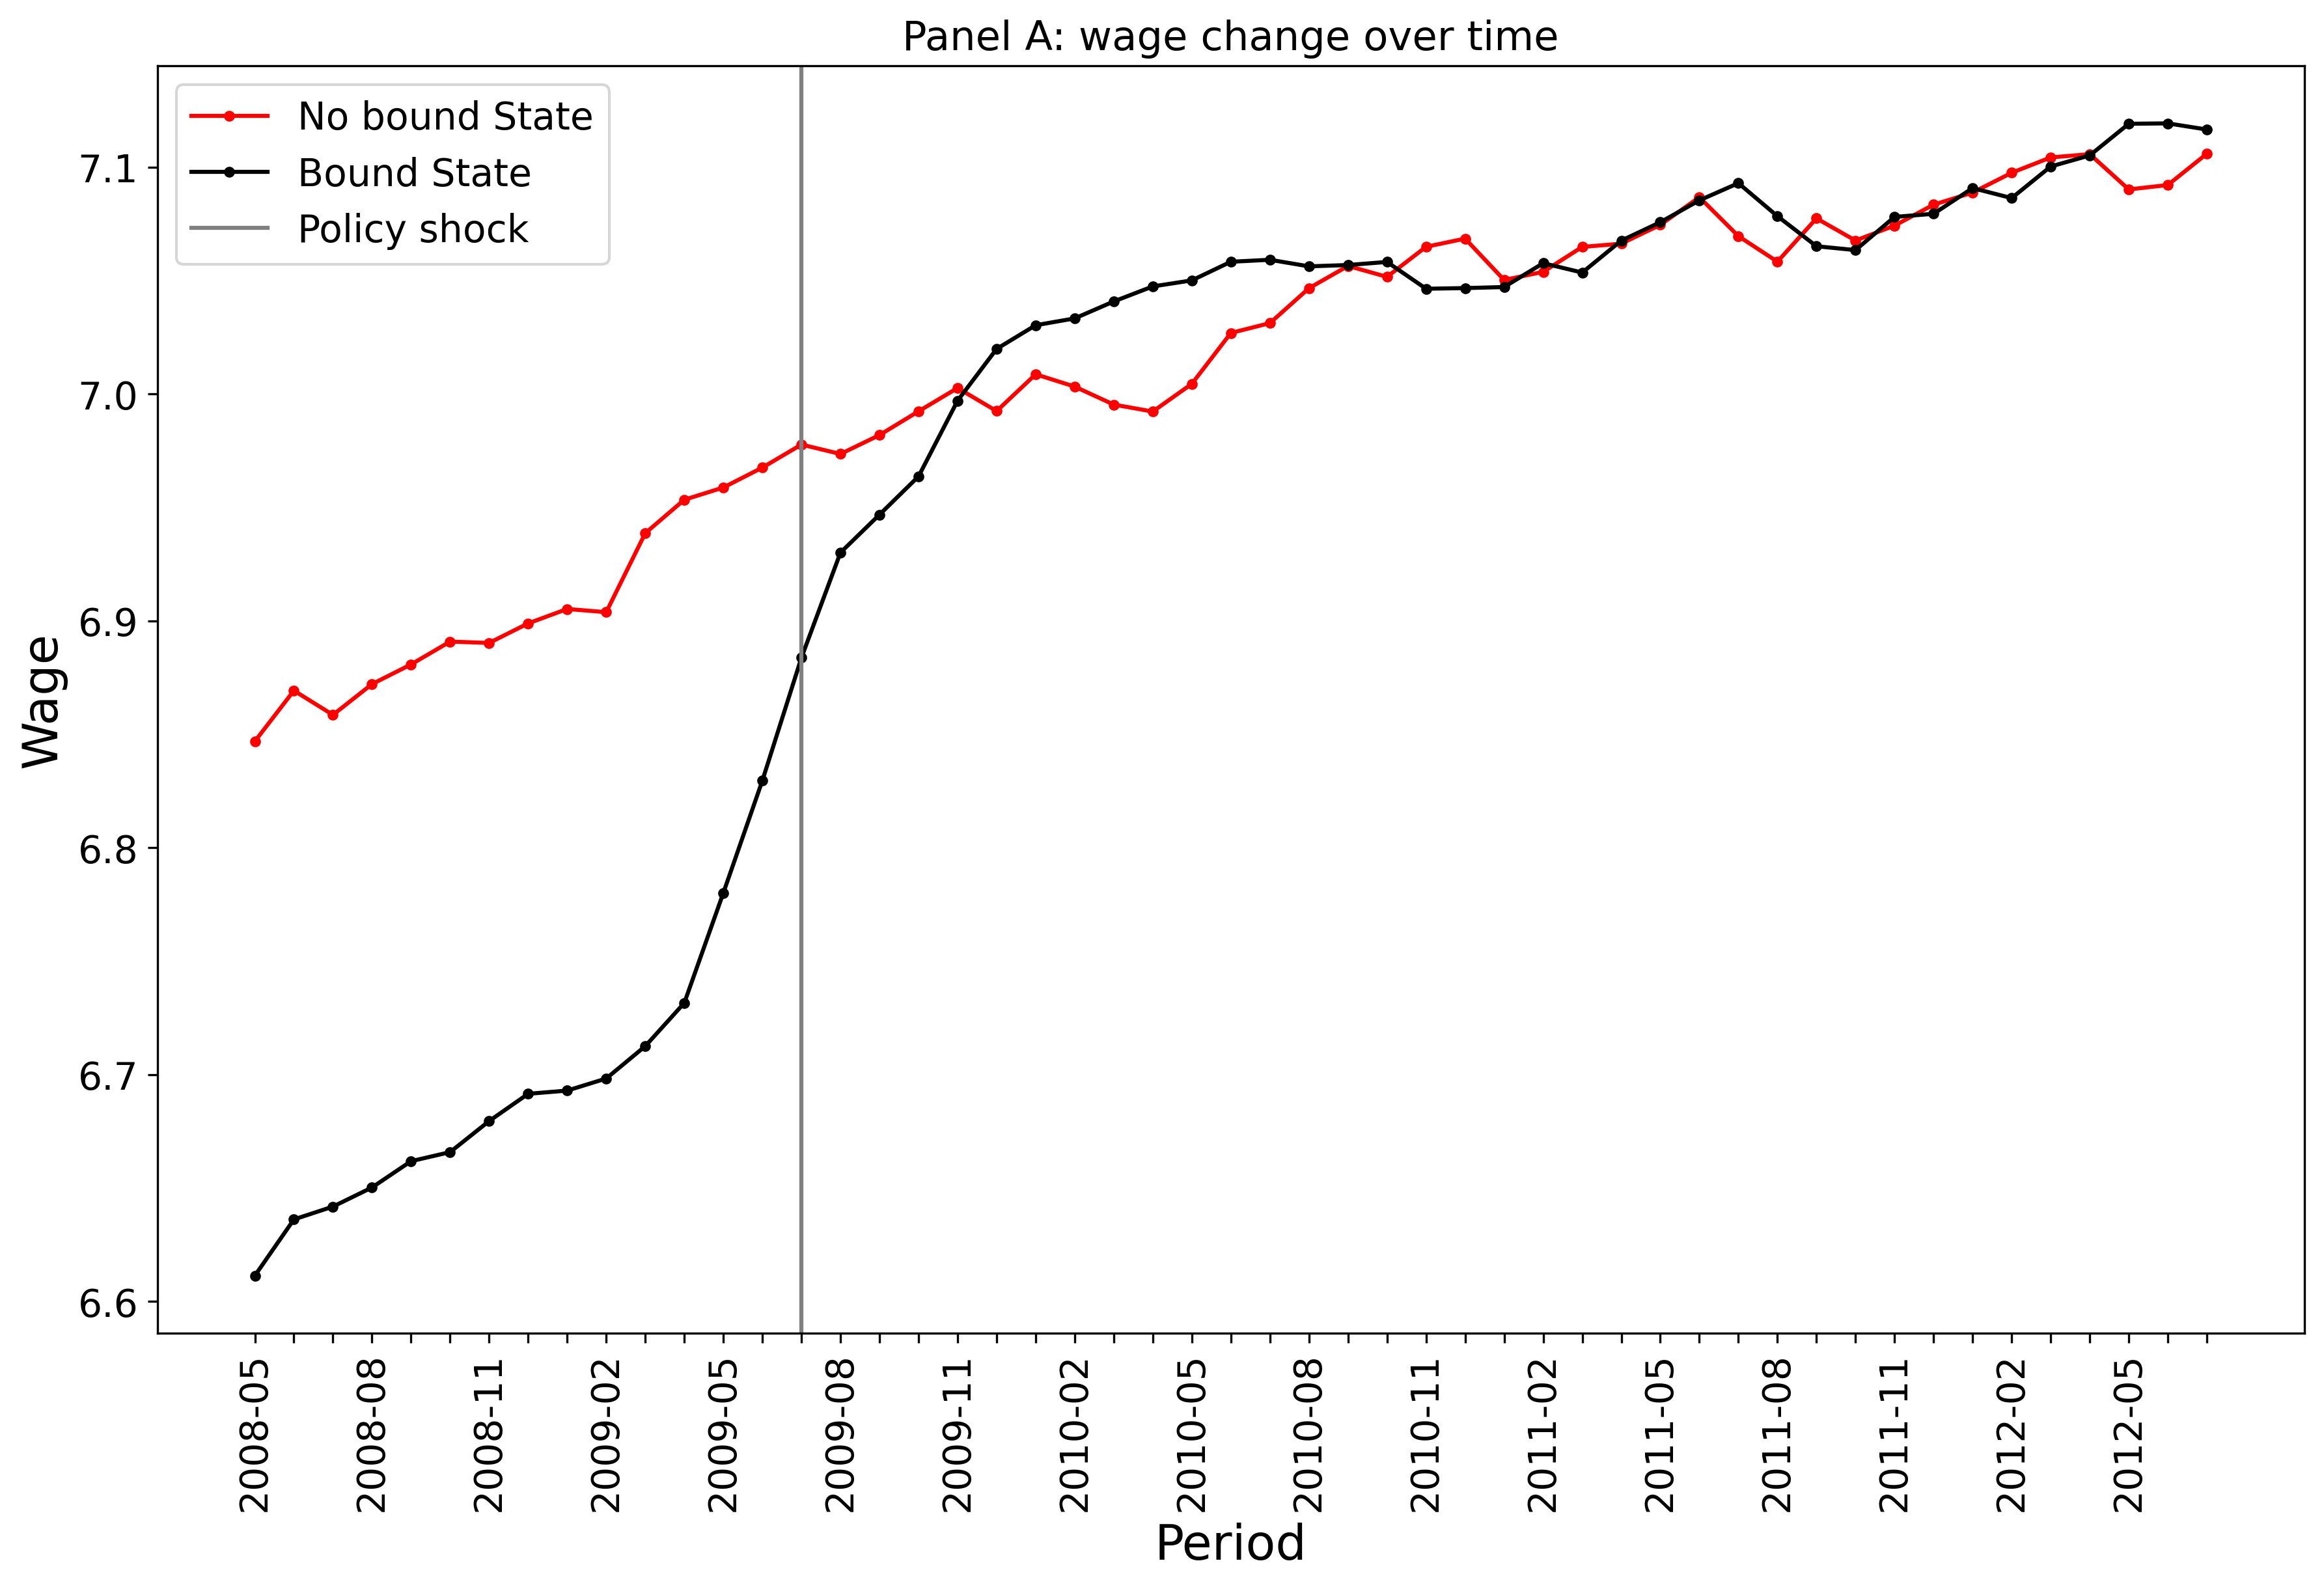

In [148]:

#use the data to draw line graph.
import matplotlib.pyplot as plt

#title = 'Market Sale Price Growth'
# subset_col = data_pd_complete[data_pd_complete['Feature'] == 'Market Sale Price Growth' ]

fig=plt.figure(figsize=(12, 8), dpi= 300, facecolor='w', edgecolor='k')


subset = wage6.copy()
x = subset['time'].to_list()
y1 = subset['no bound wage'].to_numpy()
y2 = subset['bound wage'].to_numpy()

# plot lines
plt.plot(x, y1, label = "No bound State", color='red',marker='.')
plt.plot(x, y2, label = "Bound State", color='black',marker='.')

plt.axvline(x='2009-07', color='gray', linestyle='-',  label = "Policy shock")




plt.xlabel('Period', fontsize=18)
plt.ylabel('Wage', fontsize=18)
plt.legend(fontsize=14) # using a size in points
#plt.xticks(range(0,len(miami_picture['Period'].tolist()))[::4],miami_picture['Period'].tolist()[::4],fontsize=14, rotation=45)
plt.xticks(fontsize=14, rotation=90)

plt.xticks(np.arange(0,51,1), [x[i] if i in range(0,51,3) else '' for i in range(0,51)])

# plt.locator_params(nbins=4)
#  plt.locator_params(axis='x', nbins=15)
# ax.xaxis.set_major_locator(plt.MaxNLocator(3))
plt.yticks(fontsize=14)
plt.tight_layout()
plt.title('Panel A: wage change over time', fontsize=15)
# plt.show()
#plt.savefig('2Market Sale Price Growth_20220502.png',dpi=300)
plt.savefig('figure 2 Panel A: wage change over time.png',bbox_inches='tight',dpi=300)

In [144]:
pwd

'/Users/yoga/Documents/Projects/10Eco_applied eco_replicate mini wage'

## draw figure 4 panel c and panel d


In [149]:
wage6

,index,rhcalyr,rhcalmn,no bound wage,bound wage,time,0
0,4,2008,May,6.846911,6.611375,2008-05,05
1,3,2008,June,6.869260,6.636166,2008-06,06
2,2,2008,July,6.858554,6.641816,2008-07,07
3,0,2008,August,6.872124,6.650235,2008-08,08
4,7,2008,September,6.880781,6.661833,2008-09,09
5,6,2008,October,6.890857,6.665828,2008-10,10
6,5,2008,November,6.890269,6.679517,2008-11,11
7,1,2008,December,6.898884,6.691538,2008-12,12
8,12,2009,January,6.905233,6.692952,2009-01,01
9,11,2009,February,6.903829,6.698270,2009-02,02


In [152]:
group1=group1.sort_values(by = ['rhcalyr', 'rhcalmn'], ascending = [True, True], na_position = 'first')

In [159]:
wave1_filterwage75_nobounded=wave1_filterwage75_nobounded.sort_values(by = ['rhcalyr', 'rhcalmn'], ascending = [True, True], na_position = 'first')

wave1_filterwage75_bounded=wave1_filterwage75_bounded.sort_values(by = ['rhcalyr', 'rhcalmn'], ascending = [True, True], na_position = 'first')


In [167]:

group1income=wave1_filterwage75_nobounded[['rhcalyr','rhcalmn', 'thtotinc']]
income1=group1income.groupby([ 'rhcalyr','rhcalmn']).mean()

group2income=wave1_filterwage75_bounded[['rhcalyr','rhcalmn', 'thtotinc']]
income2=group2income.groupby([ 'rhcalyr','rhcalmn']).mean()




In [168]:

income1=income1.rename(columns={'thtotinc':'no bound income'})


income2=income2.rename(columns={'thtotinc':' bound income'})

In [169]:
income3=income1.merge(income2,left_on=['rhcalyr','rhcalmn'],right_on=['rhcalyr','rhcalmn'],how='left')

In [171]:
# income3.to_csv('income for figure 4.csv')

In [173]:
income4=income3.copy()
income4.reset_index(inplace=True)

In [174]:
income4

,rhcalyr,rhcalmn,no bound income,bound income
0,2008,August,4826.365437,4713.229036
1,2008,December,4937.239289,4487.103399
2,2008,July,4874.927873,4719.010656
3,2008,June,4588.639706,4685.811705
4,2008,May,4377.307971,4572.425532
5,2008,November,4792.265925,4534.516575
6,2008,October,5050.101156,4720.616209
7,2008,September,4928.239963,4686.615928
8,2009,April,4993.074745,4423.506902
9,2009,August,5055.680523,4645.658451


In [175]:
income5=income4.merge(monthpd,left_on='rhcalmn',right_index=True,how='left')

In [178]:
income5['time']=''
for i in range(len(income5)):
    income5['time'][i]=str(income5['rhcalyr'][i])+'-'+income5[0][i]

<ipython-input-178-b4a97e2c21b7>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  income5['time'][i]=str(income5['rhcalyr'][i])+'-'+income5[0][i]


In [179]:

income5=income5.sort_values(by='time',ascending=True)
income5=income5.reset_index(drop=True)

In [183]:
income5.columns

Index(['rhcalyr', 'rhcalmn', 'no bound income', ' bound income', 0, 'time'], dtype='object')

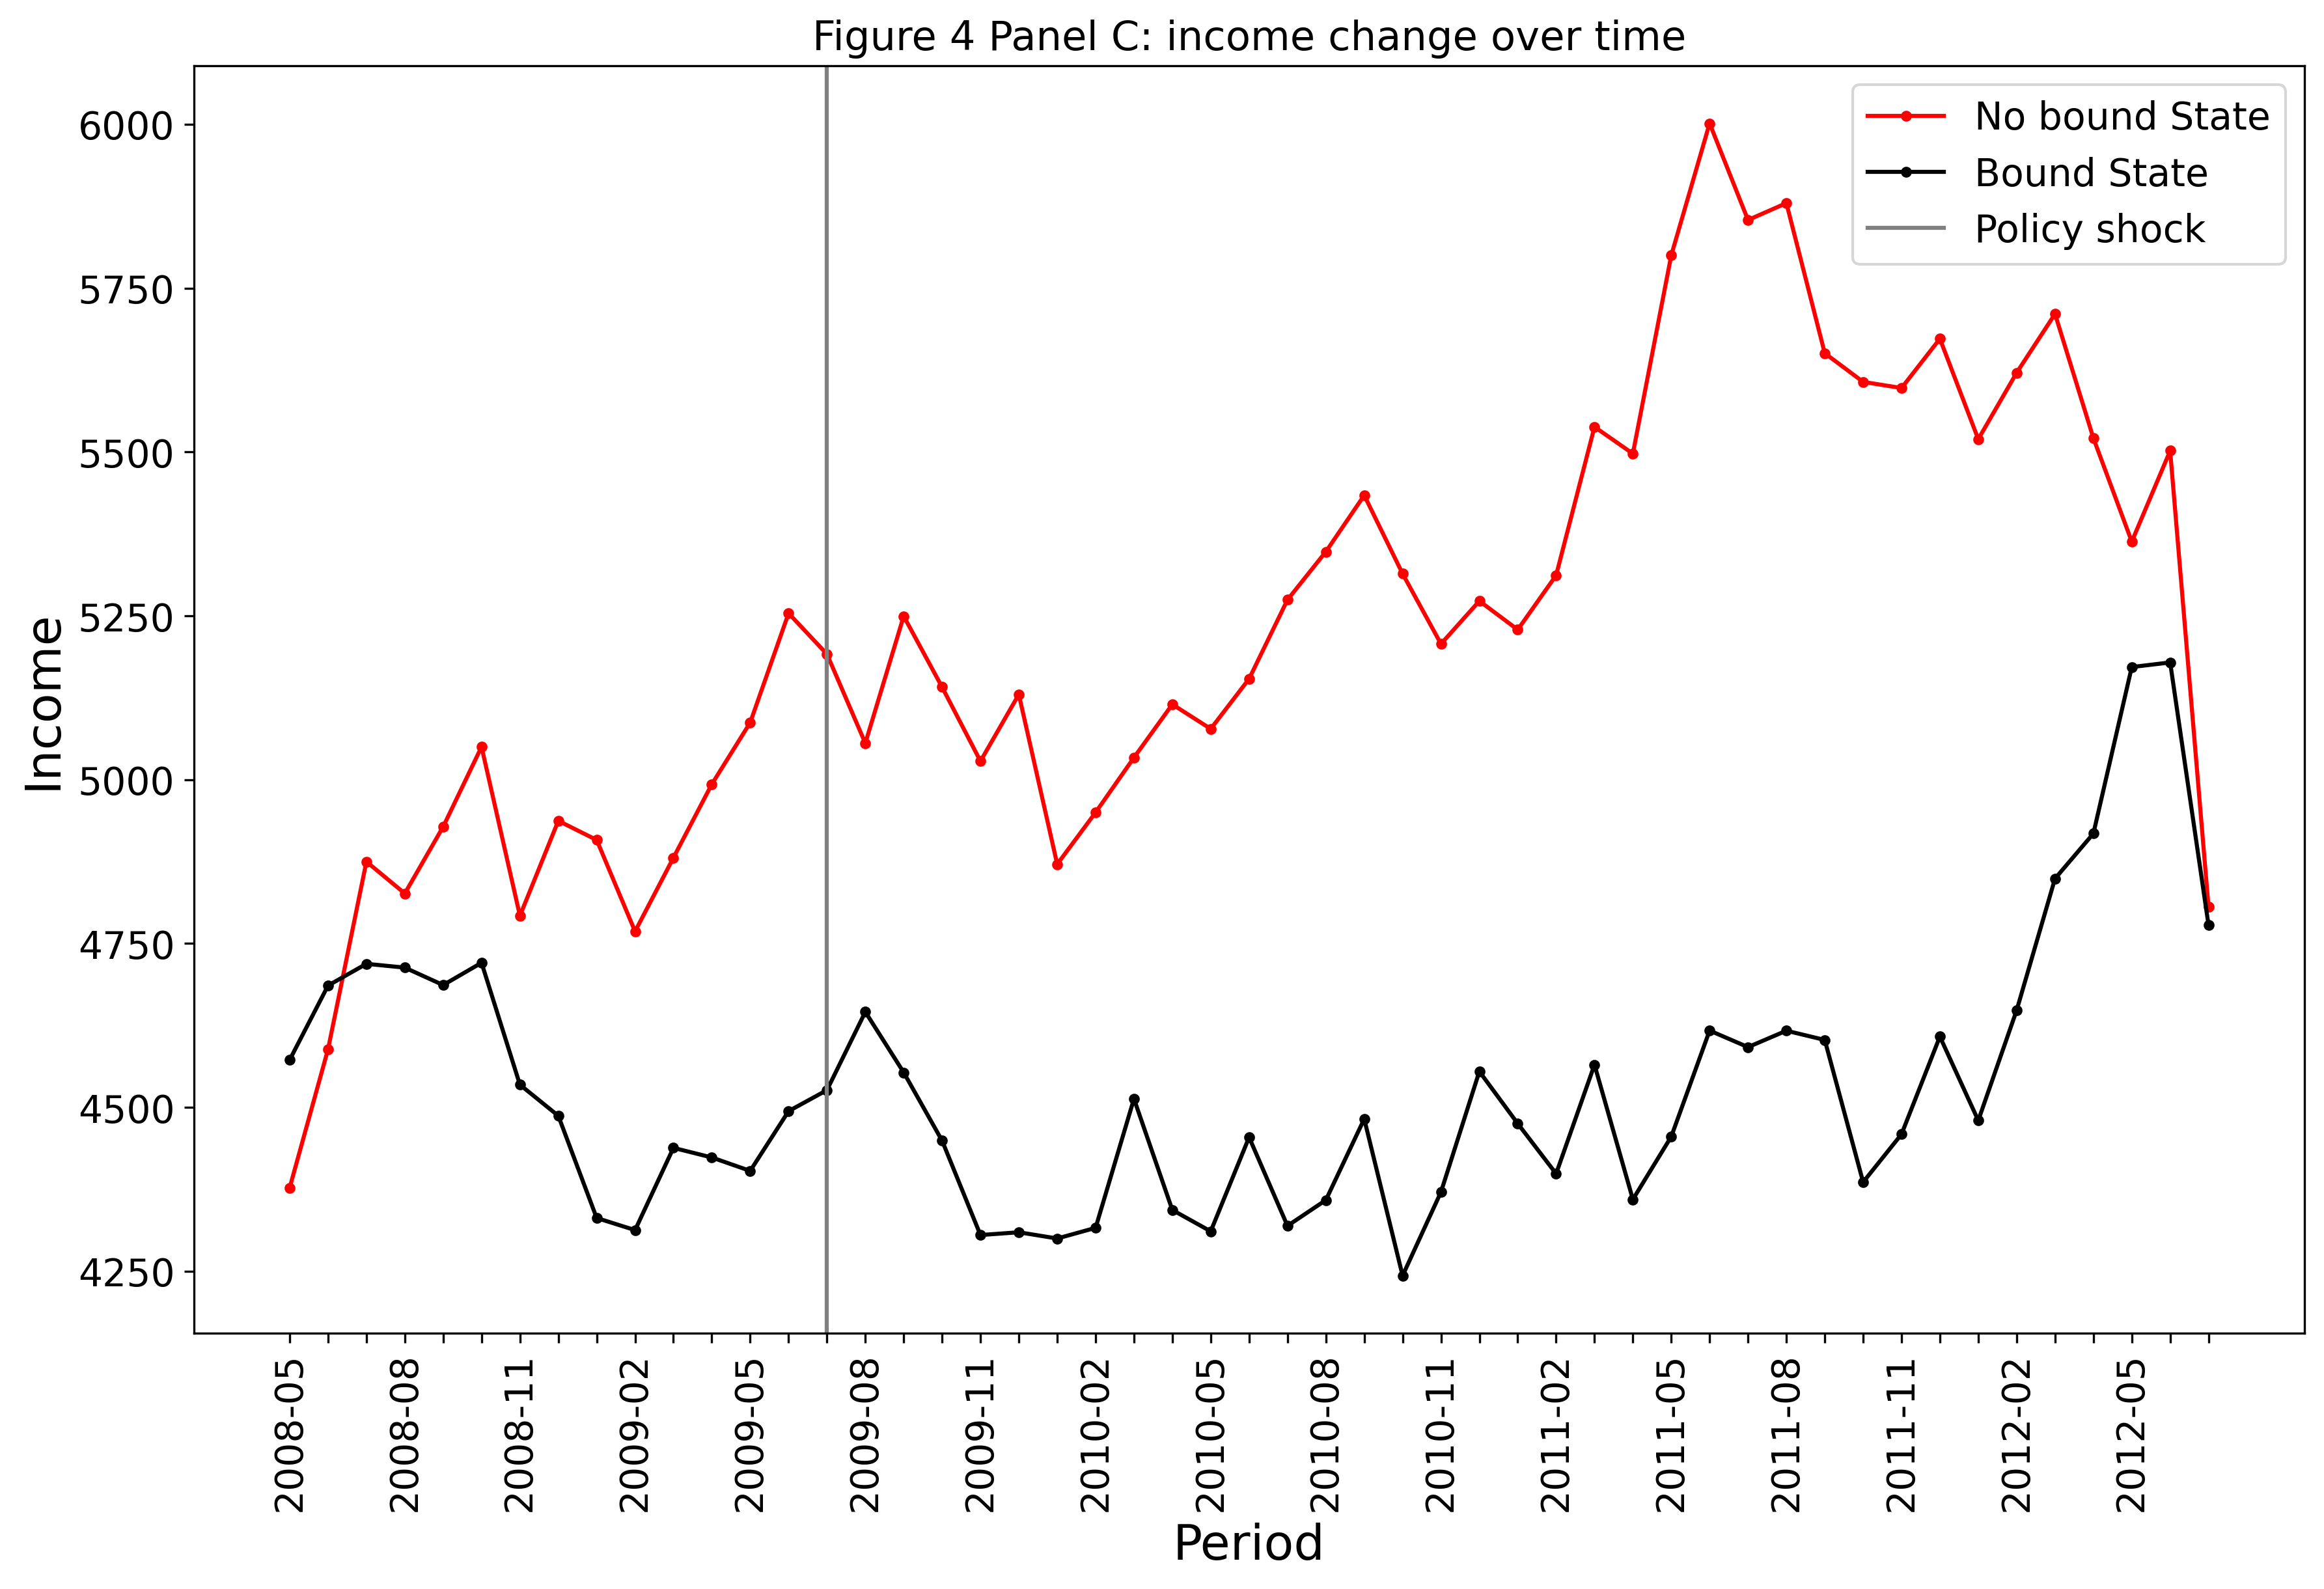

In [186]:
#use the data to draw line graph.
import matplotlib.pyplot as plt

#title = 'Market Sale Price Growth'
# subset_col = data_pd_complete[data_pd_complete['Feature'] == 'Market Sale Price Growth' ]

fig=plt.figure(figsize=(12, 8), dpi= 300, facecolor='w', edgecolor='k')


subset = income5.copy()
x = subset['time'].to_list()
y1 = subset['no bound income'].to_numpy()
y2 = subset[' bound income'].to_numpy()

# plot lines
plt.plot(x, y1, label = "No bound State", color='red',marker='.')
plt.plot(x, y2, label = "Bound State", color='black',marker='.')

plt.axvline(x='2009-07', color='gray', linestyle='-',  label = "Policy shock")




plt.xlabel('Period', fontsize=18)
plt.ylabel('Income', fontsize=18)
plt.legend(fontsize=14) # using a size in points
#plt.xticks(range(0,len(miami_picture['Period'].tolist()))[::4],miami_picture['Period'].tolist()[::4],fontsize=14, rotation=45)
plt.xticks(fontsize=14, rotation=90)

plt.xticks(np.arange(0,51,1), [x[i] if i in range(0,51,3) else '' for i in range(0,51)])

# plt.locator_params(nbins=4)
#  plt.locator_params(axis='x', nbins=15)
# ax.xaxis.set_major_locator(plt.MaxNLocator(3))
plt.yticks(fontsize=14)
plt.tight_layout()
plt.title('Figure 4 Panel C: income change over time', fontsize=15)
# plt.show()
#plt.savefig('2Market Sale Price Growth_20220502.png',dpi=300)
# plt.savefig('Figure 4 Panel C: income change over time.png',bbox_inches='tight',dpi=300)

## prepare the data for regression in table 2 column1


### import data

In [3]:
nobound725=pd.read_csv('/Users/yoga/Documents/Projects/10Eco_applied eco_replicate mini wage/SIPP/useful data after processing/0filterwage75_nobounded725.csv')

In [4]:
bound725=pd.read_csv('/Users/yoga/Documents/Projects/10Eco_applied eco_replicate mini wage/SIPP/useful data after processing/1filterwage75_bounded725.csv')

/Users/yoga/opt/anaconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3071: DtypeWarning: Columns (7) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [10]:
# bound725

In [9]:
# nobound725

In [11]:
age64=pd.read_csv('/Users/yoga/Documents/Projects/10Eco_applied eco_replicate mini wage/SIPP/useful data after processing/age_16_64_with_wage_info.csv')

/Users/yoga/opt/anaconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3071: DtypeWarning: Columns (8) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [12]:
age64

,Unnamed: 0,ssuid,tage,tpyrate1,tfipsst,euectyp5,eawop,rmhrswk,ehrsall,ehrsbs1,ehrsbs2,thearn,thtotinc,rhpov,rfpov,rfownkid,eeducate,rhcalmn,rhcalyr
0,16,19128000334,25,10.00,New York,Not in Universe,No,All weeks 35+,40,Not in Universe,Not in Universe,5000,5002,1228,1228,0,Bachelor's degree (for example:,January,2011
1,17,19128000334,25,10.00,New York,Not in Universe,No,All weeks 35+,40,Not in Universe,Not in Universe,5000,5002,1466,1466,1,Bachelor's degree (for example:,October,2010
2,18,19128000334,25,10.00,New York,Not in Universe,No,All weeks 35+,40,Not in Universe,Not in Universe,5000,5002,1220,1220,0,Bachelor's degree (for example:,November,2010
3,19,19128000334,25,10.00,New York,Not in Universe,No,All weeks 35+,40,Not in Universe,Not in Universe,5000,5002,1222,1222,0,Bachelor's degree (for example:,December,2010
4,29,19128000932,18,10.00,Louisiana,Not in Universe,Yes,All weeks 1-34 hours,20,Not in Universe,Not in Universe,8799,10584,1923,1923,2,11th Grade,January,2011
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
962105,4221094,955925986857,59,14.87,New York,Not in Universe,Yes,At least 1 week but not all weeks,30,Not in Universe,Not in Universe,3112,3134,1280,1280,0,Associate (2-yr) college degree,June,2012
962106,4221115,955958986671,22,9.27,California,Not in Universe,No,All weeks 1-34 hours,20,Not in Universe,Not in Universe,0,0,994,994,0,Bachelor's degree (for example:,March,2012
962107,4221116,955958986671,22,9.27,California,Not in Universe,No,All weeks 1-34 hours,20,Not in Universe,Not in Universe,0,0,996,996,0,Bachelor's degree (for example:,May,2012
962108,4221117,955958986671,22,9.27,California,Not in Universe,No,All weeks 1-34 hours,20,Not in Universe,Not in Universe,0,0,995,995,0,Bachelor's degree (for example:,June,2012


In [13]:
#wage<7.5

filterwage75=age64[age64['tpyrate1']<7.5]

In [14]:
filterwage75

,Unnamed: 0,ssuid,tage,tpyrate1,tfipsst,euectyp5,eawop,rmhrswk,ehrsall,ehrsbs1,ehrsbs2,thearn,thtotinc,rhpov,rfpov,rfownkid,eeducate,rhcalmn,rhcalyr
100,856,19344123268,59,4.19,Florida,Not in Universe,No,All weeks 35+,55,Not in Universe,Not in Universe,5700,7097,1879,1879,1,"Some college, but no degree",October,2010
101,857,19344123268,59,4.19,Florida,Not in Universe,No,All weeks 35+,55,Not in Universe,Not in Universe,5700,7097,1883,1883,1,"Some college, but no degree",December,2010
102,858,19344123268,59,4.19,Florida,Not in Universe,No,All weeks 35+,55,Not in Universe,Not in Universe,5700,7097,1880,1880,1,"Some college, but no degree",November,2010
103,859,19344123268,59,4.19,Florida,Not in Universe,No,All weeks 35+,55,Not in Universe,Not in Universe,5700,7097,1892,1892,1,"Some college, but no degree",January,2011
162,1098,19344246159,17,7.00,Florida,Not in Universe,No,All weeks 1-34 hours,10,Not in Universe,Not in Universe,10130,10264,1466,1466,1,10th Grade,October,2010
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
961989,4220586,955925944720,16,7.25,New York,Not in Universe,No,"Did not work (did not have a job,",12,Not in Universe,Not in Universe,8766,8771,2009,2009,2,11th Grade,April,2012
962038,4220751,955925975196,23,2.65,Michigan,Not in Universe,Yes,All weeks 1-34 hours,25,Not in Universe,Not in Universe,1600,1602,996,996,0,"Some college, but no degree",May,2012
962039,4220752,955925975196,23,2.65,Michigan,Not in Universe,Yes,All weeks 1-34 hours,25,Not in Universe,Not in Universe,2400,2402,997,997,0,"Some college, but no degree",April,2012
962040,4220753,955925975196,23,2.65,Michigan,Not in Universe,Yes,At least 1 week but not all weeks,25,Not in Universe,Not in Universe,1500,1502,995,995,0,"Some college, but no degree",June,2012


In [16]:
state2=state[['State','bounded']]

In [17]:
filterwage75_1=filterwage75.merge(state2,left_on='tfipsst',right_on='State',how='left')

In [22]:
filterwage75_1['bounded'].unique()

array([ 0.,  1., nan])

In [28]:
filterwage75_2=filterwage75_1[['ssuid','rhcalmn','rhcalyr','tpyrate1','State','bounded']]

In [29]:
filterwage75_2

,ssuid,rhcalmn,rhcalyr,tpyrate1,State,bounded
0,19344123268,October,2010,4.19,Florida,0.0
1,19344123268,December,2010,4.19,Florida,0.0
2,19344123268,November,2010,4.19,Florida,0.0
3,19344123268,January,2011,4.19,Florida,0.0
4,19344246159,October,2010,7.00,Florida,0.0
...,...,...,...,...,...,...
81965,955925944720,April,2012,7.25,New York,0.0
81966,955925975196,May,2012,2.65,Michigan,0.0
81967,955925975196,April,2012,2.65,Michigan,0.0
81968,955925975196,June,2012,2.65,Michigan,0.0


In [48]:
filterwage75_2=filterwage75_2.merge(monthpd,left_on='rhcalmn',right_index=True,how='left')

In [49]:
filterwage75_2

,ssuid,rhcalmn,rhcalyr,tpyrate1,State,bounded,0
0,19344123268,October,2010,4.19,Florida,0.0,10
1,19344123268,December,2010,4.19,Florida,0.0,12
2,19344123268,November,2010,4.19,Florida,0.0,11
3,19344123268,January,2011,4.19,Florida,0.0,01
4,19344246159,October,2010,7.00,Florida,0.0,10
...,...,...,...,...,...,...,...
81965,955925944720,April,2012,7.25,New York,0.0,04
81966,955925975196,May,2012,2.65,Michigan,0.0,05
81967,955925975196,April,2012,2.65,Michigan,0.0,04
81968,955925975196,June,2012,2.65,Michigan,0.0,06


In [51]:
filterwage75_2['time']=''
for i in range(len(filterwage75_2)):
    filterwage75_2['time'][i]=str(filterwage75_2['rhcalyr'][i])+'-'+filterwage75_2[0][i]

<ipython-input-51-4bdb632a9357>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filterwage75_2['time'][i]=str(filterwage75_2['rhcalyr'][i])+'-'+filterwage75_2[0][i]


In [52]:
filterwage75_2

,ssuid,rhcalmn,rhcalyr,tpyrate1,State,bounded,0,time
0,19344123268,October,2010,4.19,Florida,0.0,10,2010-10
1,19344123268,December,2010,4.19,Florida,0.0,12,2010-12
2,19344123268,November,2010,4.19,Florida,0.0,11,2010-11
3,19344123268,January,2011,4.19,Florida,0.0,01,2011-01
4,19344246159,October,2010,7.00,Florida,0.0,10,2010-10
...,...,...,...,...,...,...,...,...
81965,955925944720,April,2012,7.25,New York,0.0,04,2012-04
81966,955925975196,May,2012,2.65,Michigan,0.0,05,2012-05
81967,955925975196,April,2012,2.65,Michigan,0.0,04,2012-04
81968,955925975196,June,2012,2.65,Michigan,0.0,06,2012-06


In [53]:
filterwage75_3=filterwage75_2.sort_values(by='time',ascending=True)
filterwage75_3=filterwage75_3.reset_index(drop=True)

In [55]:
filterwage75_4=filterwage75_3.drop(columns=[0])

In [56]:
filterwage75_4

,ssuid,rhcalmn,rhcalyr,tpyrate1,State,bounded,time
0,396128451883,May,2008,7.35,Ohio,0.0,2008-05
1,730925074116,May,2008,6.00,Louisiana,1.0,2008-05
2,916925488534,May,2008,6.25,Alabama,1.0,2008-05
3,396925358098,May,2008,3.50,Ohio,0.0,2008-05
4,730925074140,May,2008,7.25,Florida,0.0,2008-05
...,...,...,...,...,...,...,...
81965,495294241689,July,2012,7.25,Texas,1.0,2012-07
81966,104925796125,July,2012,5.69,Connecticut,0.0,2012-07
81967,495187370894,July,2012,7.25,Texas,1.0,2012-07
81968,495294743630,July,2012,7.25,Texas,1.0,2012-07


In [57]:
#August 2009 through July 2010 is period “Post 1” and all subsequent months are period “Post 2.”
#2009-08 -2010-07 is post1
#2010-08 to 2012-07 is post2
filterwage75_5=filterwage75_4.copy()

filterwage75_5['time'] = pd.to_datetime(filterwage75_5['time'])

In [67]:
post1=filterwage75_5[(filterwage75_5['time']>'2009-07-01')&(filterwage75_5['time']<'2010-08-01')]

In [69]:
post1['post1']=1

<ipython-input-69-3dbc96229969>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  post1['post1']=1


In [71]:
post1['post2']=0

<ipython-input-71-d237878f505f>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  post1['post2']=0


In [72]:
post1

,ssuid,rhcalmn,rhcalyr,tpyrate1,State,bounded,time,post1,post2
31917,203925396155,August,2009,6.80,Florida,0.0,2009-08-01,1,0
31918,203925392343,August,2009,2.13,Louisiana,1.0,2009-08-01,1,0
31919,495023123029,August,2009,7.25,Texas,1.0,2009-08-01,1,0
31920,952925130696,August,2009,6.00,Indiana,1.0,2009-08-01,1,0
31921,489925871671,August,2009,2.50,Alabama,1.0,2009-08-01,1,0
...,...,...,...,...,...,...,...,...,...
52707,952344651630,July,2010,6.00,Texas,1.0,2010-07-01,1,0
52708,955925196020,July,2010,7.15,New York,0.0,2010-07-01,1,0
52709,104925422346,July,2010,3.60,Ohio,0.0,2010-07-01,1,0
52710,458925701531,July,2010,4.10,Florida,0.0,2010-07-01,1,0


In [75]:
post2=filterwage75_5[filterwage75_5['time']>'2010-07-01']

In [77]:
post2['post1']=0
post2['post2']=1

<ipython-input-77-49059c451961>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  post2['post1']=0
<ipython-input-77-49059c451961>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  post2['post2']=1


In [78]:
post2

,ssuid,rhcalmn,rhcalyr,tpyrate1,State,bounded,time,post1,post2
52712,679379266966,August,2010,7.00,Alabama,1.0,2010-08-01,0,1
52713,874925651251,August,2010,7.15,New Jersey,0.0,2010-08-01,0,1
52714,874925489195,August,2010,4.25,Arizona,0.0,2010-08-01,0,1
52715,679353358201,August,2010,7.36,Virginia,1.0,2010-08-01,0,1
52716,955344583692,August,2010,7.40,Michigan,0.0,2010-08-01,0,1
...,...,...,...,...,...,...,...,...,...
81965,495294241689,July,2012,7.25,Texas,1.0,2012-07-01,0,1
81966,104925796125,July,2012,5.69,Connecticut,0.0,2012-07-01,0,1
81967,495187370894,July,2012,7.25,Texas,1.0,2012-07-01,0,1
81968,495294743630,July,2012,7.25,Texas,1.0,2012-07-01,0,1


In [79]:
post0=filterwage75_5[filterwage75_5['time']<'2009-08-01']

In [81]:
post0[['post1','post2']]=[0,0]

<ipython-input-81-00909a2b5deb>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  post0[['post1','post2']]=[0,0]
/Users/yoga/opt/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1700: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, v, pi)


In [82]:
post0

,ssuid,rhcalmn,rhcalyr,tpyrate1,State,bounded,time,post1,post2
0,396128451883,May,2008,7.35,Ohio,0.0,2008-05-01,0,0
1,730925074116,May,2008,6.00,Louisiana,1.0,2008-05-01,0,0
2,916925488534,May,2008,6.25,Alabama,1.0,2008-05-01,0,0
3,396925358098,May,2008,3.50,Ohio,0.0,2008-05-01,0,0
4,730925074140,May,2008,7.25,Florida,0.0,2008-05-01,0,0
...,...,...,...,...,...,...,...,...,...
31912,104925910324,July,2009,4.65,Iowa,0.0,2009-07-01,0,0
31913,794344754173,July,2009,6.55,Tennessee,1.0,2009-07-01,0,0
31914,644925266944,July,2009,7.25,Texas,1.0,2009-07-01,0,0
31915,404958074899,July,2009,7.25,Alabama,1.0,2009-07-01,0,0


In [86]:
all_pd= pd.concat([post0, post1,post2])

In [88]:
all_pd['bound*post1']=all_pd['bounded']*all_pd['post1']
all_pd['bound*post2']=all_pd['bounded']*all_pd['post2']

In [93]:
all_pd['ssuid'].nunique()

6116

In [94]:
all_pd

,ssuid,rhcalmn,rhcalyr,tpyrate1,State,bounded,time,post1,post2,bound*post1,bound*post2
0,396128451883,May,2008,7.35,Ohio,0.0,2008-05-01,0,0,0.0,0.0
1,730925074116,May,2008,6.00,Louisiana,1.0,2008-05-01,0,0,0.0,0.0
2,916925488534,May,2008,6.25,Alabama,1.0,2008-05-01,0,0,0.0,0.0
3,396925358098,May,2008,3.50,Ohio,0.0,2008-05-01,0,0,0.0,0.0
4,730925074140,May,2008,7.25,Florida,0.0,2008-05-01,0,0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
81965,495294241689,July,2012,7.25,Texas,1.0,2012-07-01,0,1,0.0,1.0
81966,104925796125,July,2012,5.69,Connecticut,0.0,2012-07-01,0,1,0.0,0.0
81967,495187370894,July,2012,7.25,Texas,1.0,2012-07-01,0,1,0.0,1.0
81968,495294743630,July,2012,7.25,Texas,1.0,2012-07-01,0,1,0.0,1.0


In [ ]:
for np.array(6116):
    

In [95]:
np.array(6116)

array(6116)

In [96]:
unique_id=all_pd['ssuid'].unique().tolist()

In [99]:
indx2id={}
for index,id1 in enumerate(unique_id):
    #print(id1,index)
    indx2id[id1]=index
    
    
    

In [102]:
pdindex=pd.DataFrame.from_dict(indx2id,orient='index')

In [104]:
all_pd2=all_pd.merge(pdindex,left_on='ssuid',right_index=True, how='left')

In [108]:
all_pd2=all_pd2.rename(columns={0:'id'})

In [109]:
all_pd2

,ssuid,rhcalmn,rhcalyr,tpyrate1,State,bounded,time,post1,post2,bound*post1,bound*post2,id
0,396128451883,May,2008,7.35,Ohio,0.0,2008-05-01,0,0,0.0,0.0,0
1,730925074116,May,2008,6.00,Louisiana,1.0,2008-05-01,0,0,0.0,0.0,1
2,916925488534,May,2008,6.25,Alabama,1.0,2008-05-01,0,0,0.0,0.0,2
3,396925358098,May,2008,3.50,Ohio,0.0,2008-05-01,0,0,0.0,0.0,3
4,730925074140,May,2008,7.25,Florida,0.0,2008-05-01,0,0,0.0,0.0,4
...,...,...,...,...,...,...,...,...,...,...,...,...
81965,495294241689,July,2012,7.25,Texas,1.0,2012-07-01,0,1,0.0,1.0,5235
81966,104925796125,July,2012,5.69,Connecticut,0.0,2012-07-01,0,1,0.0,0.0,2060
81967,495187370894,July,2012,7.25,Texas,1.0,2012-07-01,0,1,0.0,1.0,3558
81968,495294743630,July,2012,7.25,Texas,1.0,2012-07-01,0,1,0.0,1.0,1969


In [110]:
all_pd2.to_csv('for regression table2 col1.csv',index=0)

In [91]:
# filterwage75_5['post1']=""

# for i in range(len(filterwage75_5)):
#     timei=filterwage75_5['time'][i]
#     if (timei>'2009-07-01 00:00:00')&(timei<'2010-08-01 00:00:00'):
#         filterwage75_5['post1'][i]=1
#     else:
#         filterwage75_5['post1'][i]=0
        


In [64]:
filterwage75_5['time'][0]

Timestamp('2008-05-01 00:00:00')